<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Despesas_Empenhadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Despesas empenhadas
[Valores registrados em contratos de serviços, aquisição de bens, etc.](http://www.transparencia.mt.gov.br/glossario?p_p_id=101_INSTANCE_wzwRd8zYRh4k&p_p_lifecycle=0&p_p_state=normal&p_p_mode=view&p_p_col_id=column-2&p_p_col_count=1&_101_INSTANCE_wzwRd8zYRh4k_delta=50&_101_INSTANCE_wzwRd8zYRh4k_keywords=&_101_INSTANCE_wzwRd8zYRh4k_advancedSearch=false&_101_INSTANCE_wzwRd8zYRh4k_andOperator=true&p_r_p_564233524_resetCur=false&_101_INSTANCE_wzwRd8zYRh4k_cur=2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
data = data[['Município', 'Codigo_IBGE', 'Despesas empenhadas']]
data

,Município,Codigo_IBGE,Despesas empenhadas
0,ADAMANTINA,3500105,"13,708,366,993"
1,ADOLFO,3500204,"2,010,387,713"
2,AGUAÍ,3500303,"7,216,873,408"
3,ÁGUAS DA PRATA,3500402,"2,436,340,149"
4,ÁGUAS DE LINDÓIA,3500501,"7,520,147,793"
...,...,...,...
640,VOTORANTIM,3557006,"34,541,468,654"
641,VOTUPORANGA,3557105,"27,205,423,556"
642,ZACARIAS,3557154,"1,871,416,876"
643,CHAVANTES,3557204,"3,434,323,006"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Município            645 non-null    object
 1   Codigo_IBGE          645 non-null    int64 
 2   Despesas empenhadas  645 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.2+ KB


###Convertendo as despesas empenhadas para ```float64``` <br>
Comparando com os dados do IBGE cidades, vemos que a conversão deve ser feita retirando as vírgulas e dividindo os valores por 100.
* Exemplo: Adamantina - SP possui o total de despesas empenhadas de R\$ 137.083,67 (x1000) = R\$ 137.083.669,93
* Exemplo: Adolfo - SP possui o total de despesas empenhadas de R\$ 20.103,88 (x1000) = R\$ 20.103.887,13

In [ ]:
def despesas_toFloat(x):
  num = x.replace(',','')
  num = float(num)
  num /= 100
  return num
data['Despesas empenhadas'] = data['Despesas empenhadas'].apply(despesas_toFloat)

In [ ]:
data.head()

,Município,Codigo_IBGE,Despesas empenhadas
0,ADAMANTINA,3500105,1.370837e+08
1,ADOLFO,3500204,2.010388e+07
2,AGUAÍ,3500303,7.216873e+07
3,ÁGUAS DA PRATA,3500402,2.436340e+07
4,ÁGUAS DE LINDÓIA,3500501,7.520148e+07


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Município            645 non-null    object 
 1   Codigo_IBGE          645 non-null    int64  
 2   Despesas empenhadas  645 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.2+ KB


##Discretização por quartis

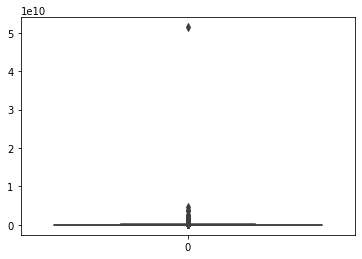

In [ ]:
sns.boxplot(data=data['Despesas empenhadas'])

Vamos utilizar a estratégia de excluir os outliers e analisar o boxplot desse "subconjunto"

In [ ]:
IQR = data['Despesas empenhadas'].quantile(.75) - data['Despesas empenhadas'].quantile(.25)
inf = data['Despesas empenhadas'].quantile(.25) - 1.5*IQR
sup = data['Despesas empenhadas'].quantile(.75) + 1.5*IQR
print("IQR = %.3f | inf = %.3f  | sup = %.3f" % (IQR, inf, sup))

IQR = 76592630.800 | inf = -96652723.490  | sup = 209717799.710


In [ ]:
# como o limite inferior é menor que zero (e todas as amostras de despesas empenhadas são valores positivos), não será necessário fazer sua verificação
semOutliers = data[data['Despesas empenhadas'] < sup].reset_index(drop=True)
semOutliers

,Município,Codigo_IBGE,Despesas empenhadas
0,ADAMANTINA,3500105,1.370837e+08
1,ADOLFO,3500204,2.010388e+07
2,AGUAÍ,3500303,7.216873e+07
3,ÁGUAS DA PRATA,3500402,2.436340e+07
4,ÁGUAS DE LINDÓIA,3500501,7.520148e+07
...,...,...,...
549,VISTA ALEGRE DO ALTO,3556909,3.137458e+07
550,VITÓRIA BRASIL,3556958,1.119788e+07
551,ZACARIAS,3557154,1.871417e+07
552,CHAVANTES,3557204,3.434323e+07


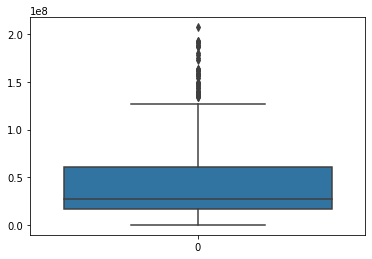

In [ ]:
sns.boxplot(data=semOutliers['Despesas empenhadas'])

Vamos, então, adotar a seguinte estratégia de discretização:
* Primeiro quartil (semOutliers): Muito Baixo
* Segundo quartil (semOutliers): Baixo
* Terceiro quartil (semOutliers): Médio
* Terceiro quartil ao limite superior (semOutliers): Alto
* Outliers (tanto do df "semOutliers" quanto do df completo): Muito Alto

In [ ]:
sup_semOutliers = semOutliers['Despesas empenhadas'].quantile(.75) + 1.5 * (semOutliers['Despesas empenhadas'].quantile(.75) - semOutliers['Despesas empenhadas'].quantile(.25))

In [ ]:
bins = [
        0, 
        semOutliers['Despesas empenhadas'].quantile(.25), 
        semOutliers['Despesas empenhadas'].quantile(.5), 
        semOutliers['Despesas empenhadas'].quantile(.75), 
        sup_semOutliers,
        data['Despesas empenhadas'].max()
        ]
labels = ['Muito Baixo', 'Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação por Despesas Empenhadas'] = pd.cut(data['Despesas empenhadas'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Despesas empenhadas,Classificação por Despesas Empenhadas
0,ADAMANTINA,3500105,1.370837e+08,Muito Alto
1,ADOLFO,3500204,2.010388e+07,Baixo
2,AGUAÍ,3500303,7.216873e+07,Alto
3,ÁGUAS DA PRATA,3500402,2.436340e+07,Baixo
4,ÁGUAS DE LINDÓIA,3500501,7.520148e+07,Alto
...,...,...,...,...
640,VOTORANTIM,3557006,3.454147e+08,Muito Alto
641,VOTUPORANGA,3557105,2.720542e+08,Muito Alto
642,ZACARIAS,3557154,1.871417e+07,Baixo
643,CHAVANTES,3557204,3.434323e+07,Médio


###Histograma da distribuição

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 4 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   Município                              645 non-null    object  
 1   Codigo_IBGE                            645 non-null    int64   
 2   Despesas empenhadas                    645 non-null    float64 
 3   Classificação por Despesas Empenhadas  645 non-null    category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 16.1+ KB


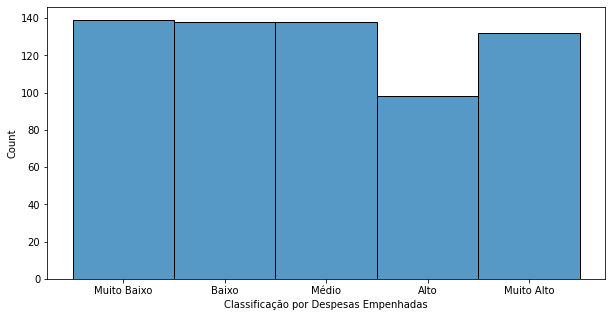

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data['Classificação por Despesas Empenhadas'])

##Discretização proposta no mapa do IBGE Cidades (estado de SP)

In [ ]:
data.drop(axis=1, labels=['Classificação por Despesas Empenhadas'], inplace=True)

In [ ]:
data.head()

,Município,Codigo_IBGE,Despesas empenhadas
0,ADAMANTINA,3500105,1.370837e+08
1,ADOLFO,3500204,2.010388e+07
2,AGUAÍ,3500303,7.216873e+07
3,ÁGUAS DA PRATA,3500402,2.436340e+07
4,ÁGUAS DE LINDÓIA,3500501,7.520148e+07


In [ ]:
bins = [0, 1000*20094.33, 1000*38963.86, 1000*117798.20, data['Despesas empenhadas'].max()]
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
data['Classificação por Despesas Empenhadas'] = pd.cut(data['Despesas empenhadas'], bins=bins, labels=labels)
data

,Município,Codigo_IBGE,Despesas empenhadas,Classificação por Despesas Empenhadas
0,ADAMANTINA,3500105,1.370837e+08,Muito Alto
1,ADOLFO,3500204,2.010388e+07,Médio
2,AGUAÍ,3500303,7.216873e+07,Alto
3,ÁGUAS DA PRATA,3500402,2.436340e+07,Médio
4,ÁGUAS DE LINDÓIA,3500501,7.520148e+07,Alto
...,...,...,...,...
640,VOTORANTIM,3557006,3.454147e+08,Muito Alto
641,VOTUPORANGA,3557105,2.720542e+08,Muito Alto
642,ZACARIAS,3557154,1.871417e+07,Baixo
643,CHAVANTES,3557204,3.434323e+07,Médio


###Histograma da distribuição

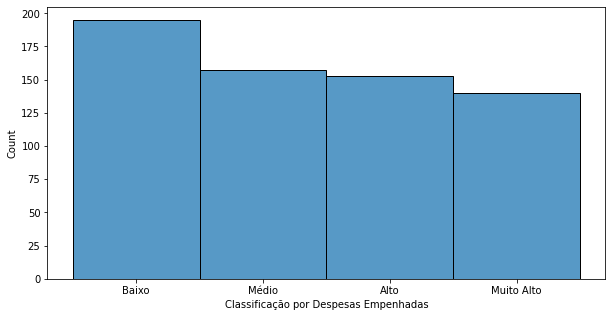

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data['Classificação por Despesas Empenhadas'])